### K-mean

In [1]:
import matplotlib.pyplot as plt
import random
import math

In [2]:
datapoints=[(1,1),(2,1),(4,3),(5,4)]

In [3]:
k=2
s_points=random.sample(datapoints, k)
print(s_points)

[(4, 3), (2, 1)]


In [4]:
def centroid(cluster):
    centre_x=0
    centre_y=0
    count=0
    for i in range(0,len(cluster)):
        centre_x = centre_x + cluster[i][0]
        centre_y = centre_y + cluster[i][1]
        count=count+1
    return centre_x/count,centre_y/count

In [5]:
def kmean(s_points,datapoints):
    temp=0
    print("seed point  is ",s_points)
    while(temp!=1):
        matrix=[]
        for i in range(len(s_points)):
            matrix_row=[]
            for j in range(len(datapoints)):
                dis=((datapoints[j][0]-s_points[i][0])**2) + ((datapoints[j][1]-s_points[i][1])**2)
                #print(math.sqrt(dis))
                matrix_row.append(math.sqrt(dis))
            matrix.append(matrix_row)
        print("matrix is ",matrix)
        print("\n")


        cluster1=[]
        cluster2=[]
        count=0

        for j in range(0,len(matrix[0])):
            if matrix[0][j]<matrix[1][j]:
                cluster1.append(datapoints[j])
            else:
                cluster2.append(datapoints[j])

        print("cluster 1 is ",cluster1)
        print("cluster 2 is ",cluster2)
        
        print("\n")
        
        centre1 = centroid(cluster1)
        centre2 = centroid(cluster2)
        
        print("centrer 1 is ",centre1)
        print("centre 2 is ",centre2)
        
        print("\n")
        
        if s_points[0]==centre1 and s_points[1]==centre2:
            temp=temp+1
            for i in range(0,len(cluster1)):
                plt.scatter(cluster1[i][0],cluster1[i][1])
            for i in range(0,len(cluster2)):   
                plt.scatter(cluster2[i][0],cluster2[i][1])
    
        else:
            s_points=(centre1,centre2)
            print("seed point  is ",s_points)  
        

seed point  is  [(4, 3), (2, 1)]
matrix is  [[3.605551275463989, 2.8284271247461903, 0.0, 1.4142135623730951], [1.0, 0.0, 2.8284271247461903, 4.242640687119285]]


cluster 1 is  [(4, 3), (5, 4)]
cluster 2 is  [(1, 1), (2, 1)]


centrer 1 is  (4.5, 3.5)
centre 2 is  (1.5, 1.0)


seed point  is  ((4.5, 3.5), (1.5, 1.0))
matrix is  [[4.301162633521313, 3.5355339059327378, 0.7071067811865476, 0.7071067811865476], [0.5, 0.5, 3.2015621187164243, 4.6097722286464435]]


cluster 1 is  [(4, 3), (5, 4)]
cluster 2 is  [(1, 1), (2, 1)]


centrer 1 is  (4.5, 3.5)
centre 2 is  (1.5, 1.0)




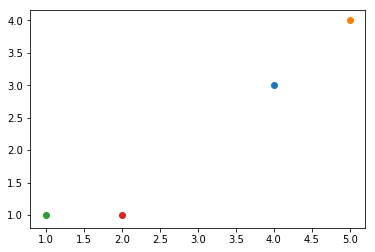

In [6]:
kmean(s_points,datapoints)

### K-medoid

In [7]:
data=[(2,6),(3,4),(3,8),(5,7),(6,2),(6,4),(7,3),(7,4),(8,5),(7,6)]

In [8]:
k=2
#s_points=random.sample(data, k)
''' We can select random seed point '''
s_points=[(6,2),(8,5)]
print(s_points)

[(6, 2), (8, 5)]


In [9]:
def distance(data,s_points):
    data1=set(data)-set(s_points)
    data_1 = list(data1)
    print("Data points after removal of seed point",data_1)
    cost_matrix1 = []
    cost_matrix2 = []
    for i in range(0,len(data_1)):
        cost1=abs(data_1[i][0]-s_points[0][0]) + abs(data_1[i][1]-s_points[0][1])
        cost2=abs(data_1[i][0]-s_points[1][0]) + abs(data_1[i][1]-s_points[1][1])
        
        cost_matrix1.append(cost1)
        cost_matrix2.append(cost2)
    return cost_matrix1,cost_matrix2,data_1
#distance(data,s_points)

In [10]:
def cluster_AND_cost(cost_matrix1,cost_matrix2,data_1,s_points):
    cluster1=[s_points[0]]
    cluster2=[s_points[1]]
    cost=0
    for i in range(0,len(cost_matrix1)):
        if cost_matrix1[i]<cost_matrix2[i]:
            cluster1.append(data_1[i])
            cost=cost+cost_matrix1[i]
        else:
            cluster2.append(data_1[i])
            cost=cost+cost_matrix2[i]

    print("Total Cost = ",cost)
    print("cluster1 ",cluster1)
    print("cluster1 ",cluster2)
    
    return cost,cluster1,cluster2

s_points  [(6, 2), (8, 5)]
Data points after removal of seed point [(6, 4), (7, 3), (2, 6), (7, 6), (5, 7), (3, 8), (7, 4), (3, 4)]
Cost from seed point 1  [2, 2, 8, 5, 6, 9, 3, 5]  Cost from seed point 2  [3, 3, 7, 2, 5, 8, 2, 6]
Total Cost =  33
cluster1  [(6, 2), (6, 4), (7, 3), (3, 4)]
cluster1  [(8, 5), (2, 6), (7, 6), (5, 7), (3, 8), (7, 4)]

s_points  [(2, 6), (6, 2)]
Data points after removal of seed point [(6, 4), (7, 3), (7, 6), (5, 7), (3, 8), (7, 4), (3, 4), (8, 5)]
Cost from seed point 1  [6, 8, 5, 4, 3, 7, 3, 7]  Cost from seed point 2  [2, 2, 5, 6, 9, 3, 5, 5]
Total Cost =  27
cluster1  [(2, 6), (5, 7), (3, 8), (3, 4)]
cluster1  [(6, 2), (6, 4), (7, 3), (7, 6), (7, 4), (8, 5)]
Final cost Difference is  6


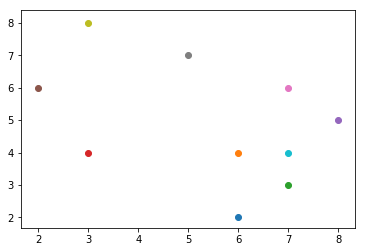

In [11]:
def k_medoid(data,s_points):
    cost_diff=0
    while(cost_diff<=0):
        print("s_points ",s_points)
        cost_matrix1,cost_matrix2,data_1 = distance(data,s_points)
        print("Cost from seed point 1 ",cost_matrix1," Cost from seed point 2 ",cost_matrix2)

        cost1,cluster1,cluster2 = cluster_AND_cost(cost_matrix1,cost_matrix2,data_1,s_points)


        #s_points_new=random.sample(data_1, 1)
        ''' We can select random seed point '''
        
        s_points_new = [(2,6)]
        s_points_new.append(s_points[0])

        s_points = s_points_new
        print("\ns_points ",s_points)

        cost_matrix11,cost_matrix12,data_1 = distance(data,s_points)
        print("Cost from seed point 1 ",cost_matrix11," Cost from seed point 2 ",cost_matrix12)
        cost2,cluster11,cluster22 = cluster_AND_cost(cost_matrix11,cost_matrix12,data_1,s_points)
        
        cost_diff = cost1 - cost2
        print("Final cost Difference is ",cost_diff)
        
    for i in range(0,len(cluster1)):
        plt.scatter(cluster1[i][0],cluster1[i][1])
    for i in range(0,len(cluster2)):
        plt.scatter(cluster2[i][0],cluster2[i][1])
    
k_medoid(data,s_points)